# Análise Exploratória dos Dados

## Sumário
a) Importando as bibliotecas

b) Leitura dos arquivos

### 1. Quantidade de gols por minuto
### 2. Quantidade de gols por jogada
### 3. Chance de sair gol por jogada
### 4. Chance de sair gol de acordo com a última ação realizada antes do gol
### 5. Importância de se jogar fora ou dentro de casa 
### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

---

#### a) Importando as bibliotecas

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### b) Leitura dos arquivos

In [34]:
df_xg = pd.read_csv('../data/processed/clean_data.csv')
print(df_xg.shape)
df_xg.head()

(362781, 23)


,league,minute,result,X,Y,xG,player,h_a,player_id,situation,...,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,player_team,winner_team,half
0,Bundesliga,11,SavedShot,0.903,0.239,0.034118,Thomas Müller,h,224,OpenPlay,...,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Chipped,Bayern Munich,Bayern Munich,first
1,Bundesliga,17,SavedShot,0.852,0.277,0.030941,Arjen Robben,h,392,OpenPlay,...,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Pass,Bayern Munich,Bayern Munich,first
2,Bundesliga,26,BlockedShot,0.803,0.277,0.021718,Arjen Robben,h,392,OpenPlay,...,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Holger Badstuber,Chipped,Bayern Munich,Bayern Munich,first
3,Bundesliga,28,SavedShot,0.871,0.324,0.050345,Thomas Müller,h,224,OpenPlay,...,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,nobody,NaN,Bayern Munich,Bayern Munich,first
4,Bundesliga,29,SavedShot,0.918,0.531,0.111078,Robert Lewandowski,h,227,OpenPlay,...,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Gianluca Gaudino,Chipped,Bayern Munich,Bayern Munich,first


Todas as análises desse notebook serão relacionadas à temporada de 2017 da principal liga da Itália, a Serie A. Selecionamos uma temporada de uma liga específica para termos análises que se conversam entre si.

### 1. Quantidade de gols por minuto

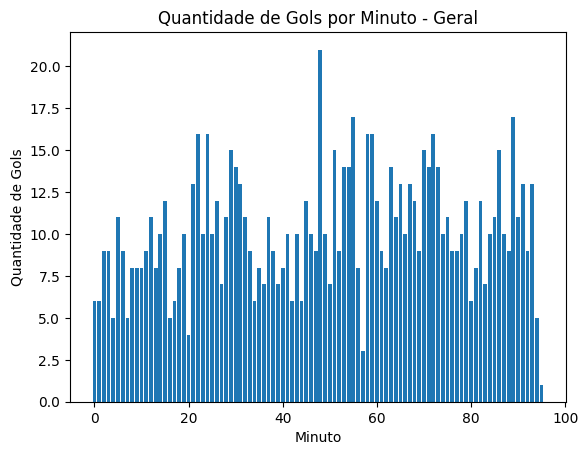

,half,result
0,first,424
1,second,557


In [36]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_plot = df_filt.groupby("minute")["result"].count().reset_index()

# Plot
plt.bar(df_plot.minute, df_plot.result)

# Adicionar rótulos e título
plt.xlabel('Minuto')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Minuto - Geral')

# Exibir o gráfico
plt.show()

df_filt.groupby("half")["result"].count().reset_index()

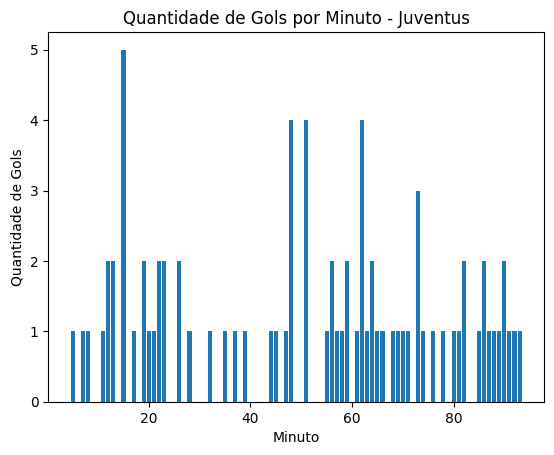

     half  result
0   first      31
1  second      51
--------------------------------------------------------------------------------


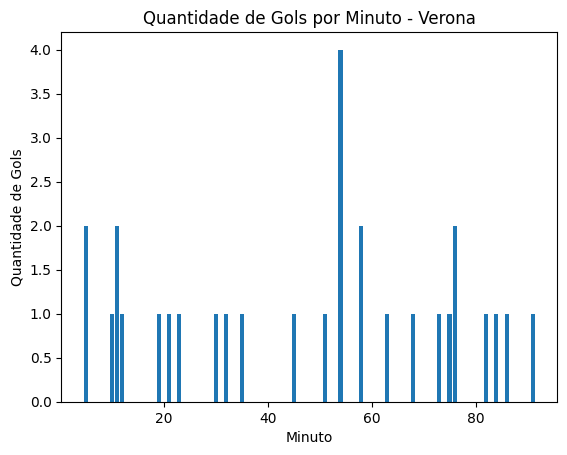

     half  result
0   first      13
1  second      17
--------------------------------------------------------------------------------


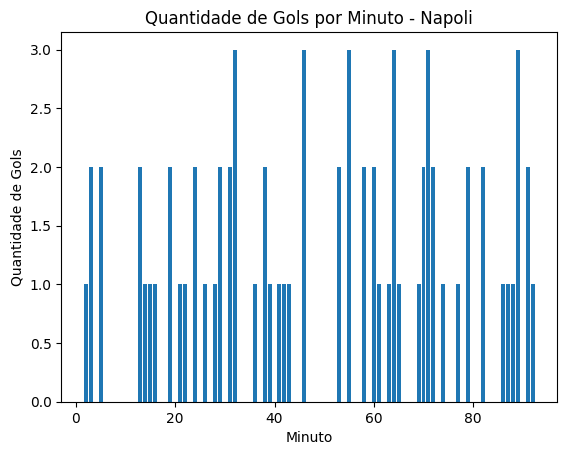

     half  result
0   first      32
1  second      41
--------------------------------------------------------------------------------


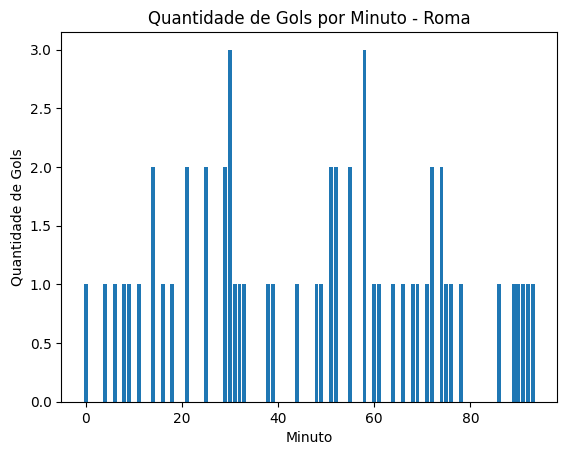

     half  result
0   first      25
1  second      31
--------------------------------------------------------------------------------


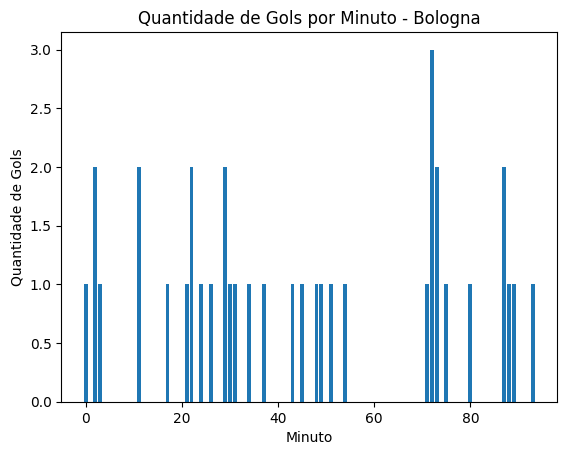

     half  result
0   first      20
1  second      17
--------------------------------------------------------------------------------


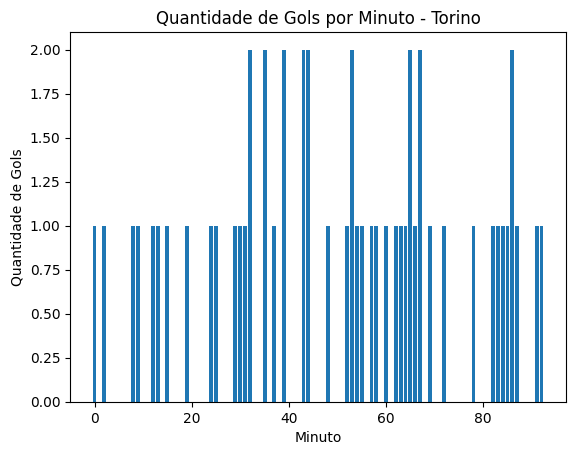

     half  result
0   first      24
1  second      29
--------------------------------------------------------------------------------


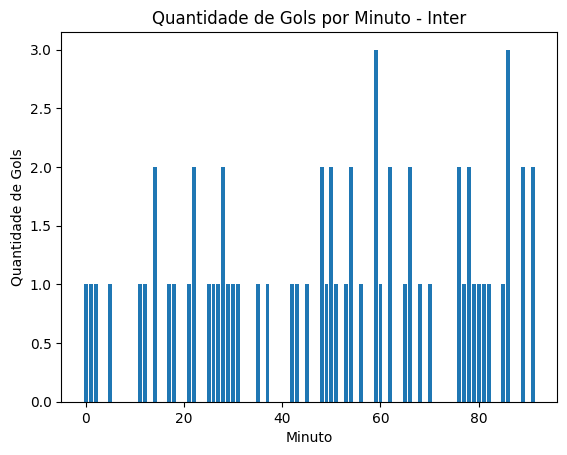

     half  result
0   first      26
1  second      38
--------------------------------------------------------------------------------


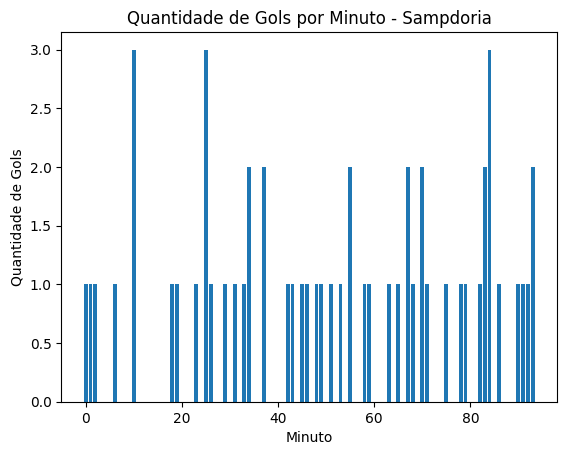

     half  result
0   first      24
1  second      32
--------------------------------------------------------------------------------


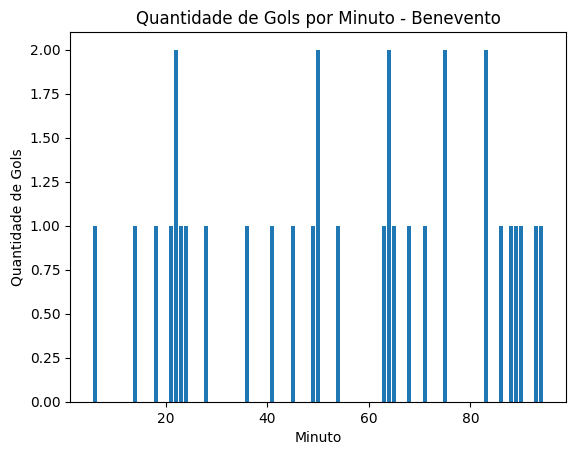

     half  result
0   first      12
1  second      20
--------------------------------------------------------------------------------


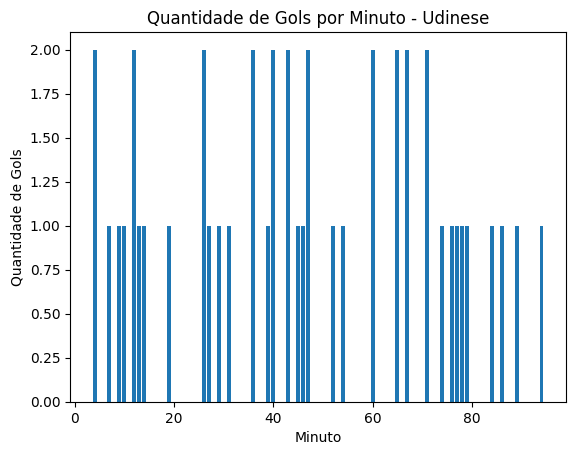

     half  result
0   first      23
1  second      22
--------------------------------------------------------------------------------


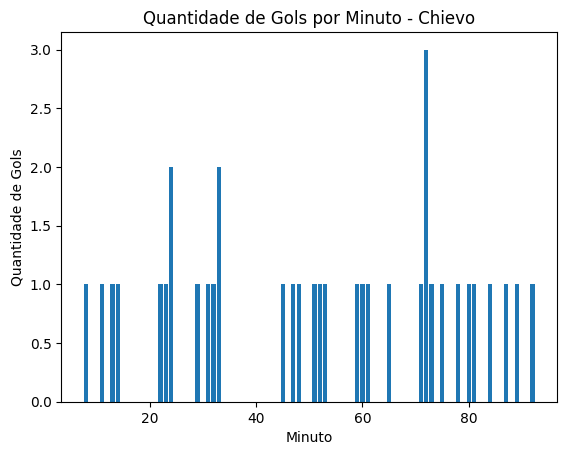

     half  result
0   first      14
1  second      22
--------------------------------------------------------------------------------


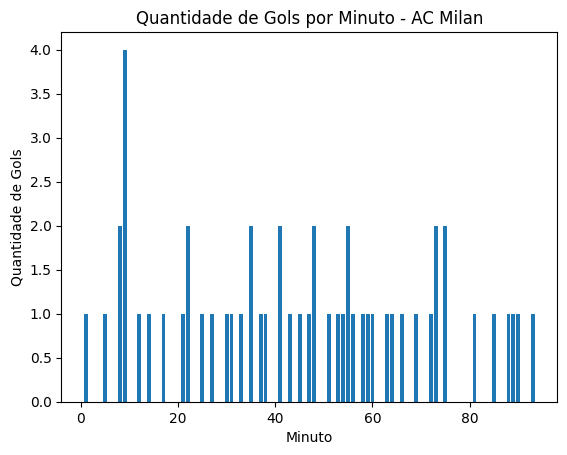

     half  result
0   first      27
1  second      27
--------------------------------------------------------------------------------


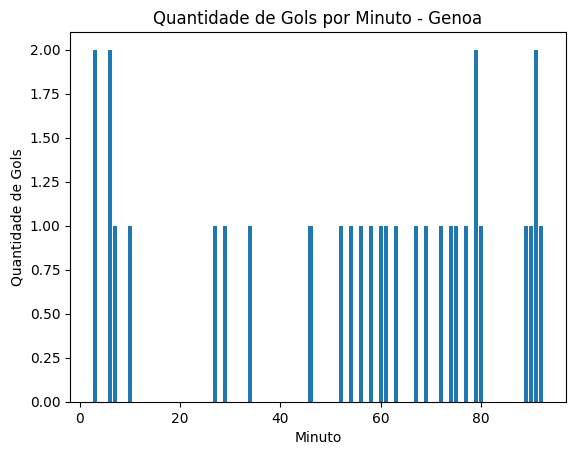

     half  result
0   first       9
1  second      22
--------------------------------------------------------------------------------


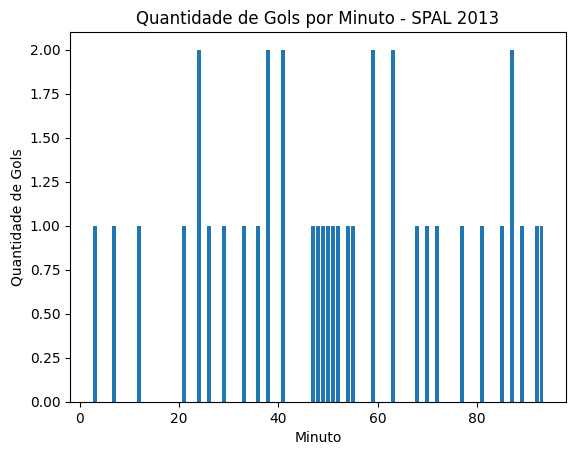

     half  result
0   first      14
1  second      23
--------------------------------------------------------------------------------


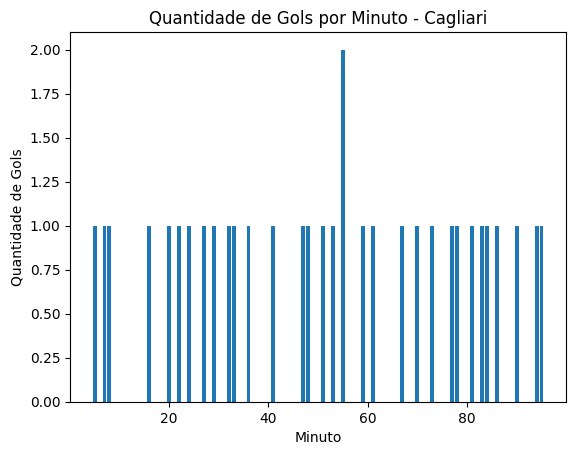

     half  result
0   first      13
1  second      20
--------------------------------------------------------------------------------


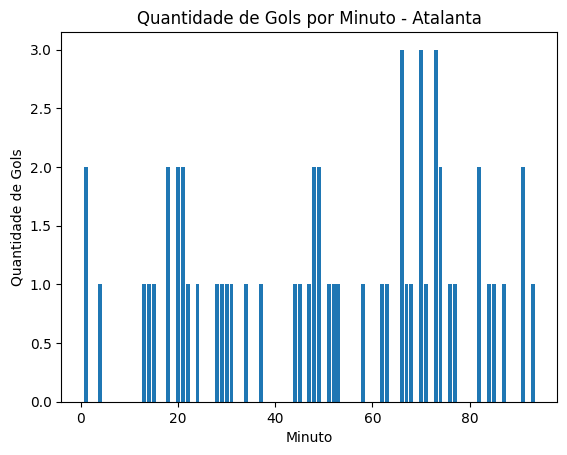

     half  result
0   first      22
1  second      35
--------------------------------------------------------------------------------


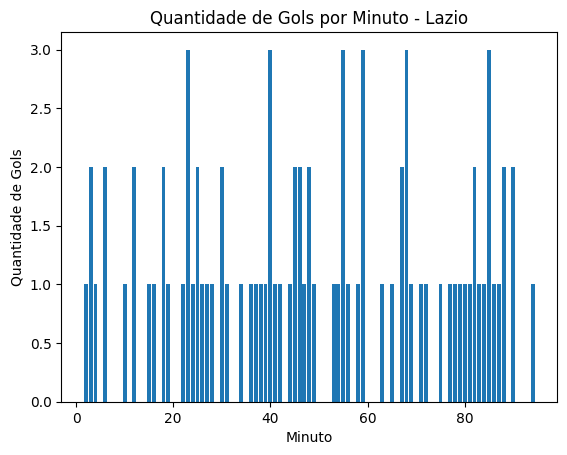

     half  result
0   first      40
1  second      46
--------------------------------------------------------------------------------


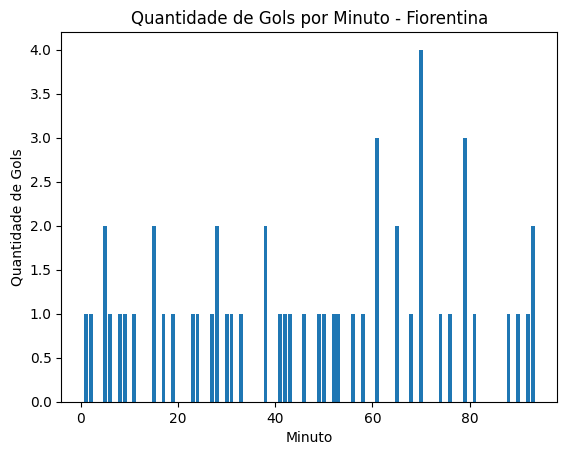

     half  result
0   first      25
1  second      28
--------------------------------------------------------------------------------


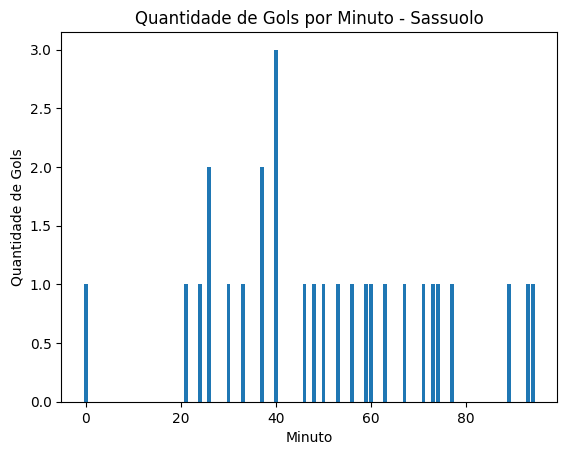

     half  result
0   first      12
1  second      16
--------------------------------------------------------------------------------


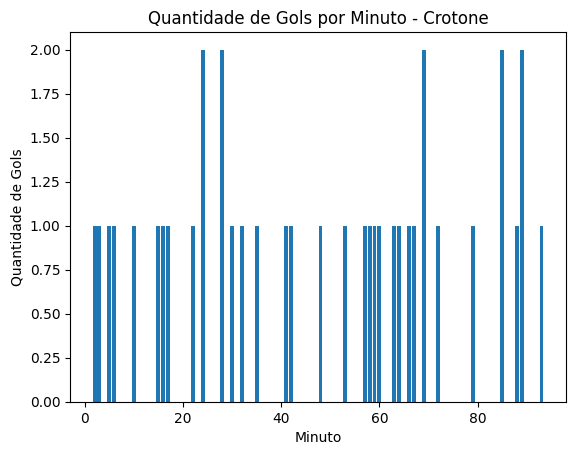

     half  result
0   first      18
1  second      20
--------------------------------------------------------------------------------


In [42]:
# Análise time por time
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
teams = df_filt.player_team.unique()
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    df_plot = df_aux.groupby("minute")["result"].count().reset_index()

    # Plot
    plt.bar(df_plot.minute, df_plot.result)

    # Adicionar rótulos e título
    plt.xlabel('Minuto')
    plt.ylabel('Quantidade de Gols')
    plt.title(f'Quantidade de Gols por Minuto - {t}')

    # Exibir o gráfico
    plt.show()

    print(df_aux.groupby("half")["result"].count().reset_index())
    print("-"*80)

##### Insights:
- A variável 'minuto' analisada de forma geral acaba não tendo muita relação na quantidade de gols marcados
- Analisando time por time, alguns times possuem uma tendência maior em marcar em certos momentos do jogo, mas na maioria dos casos a variável 'minuto' acaba não tendo muita relação com a quantidade de gols.
- Em relação aos tempos(1º e 2º), tendência maior em sair gols na segunda metade analisando tanto de forma geral quanto de forma desdobrada entre as equipes

### 2. Quantidade de gols por jogada

In [18]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_filt = df_filt.groupby("situation")["result"].count().reset_index()

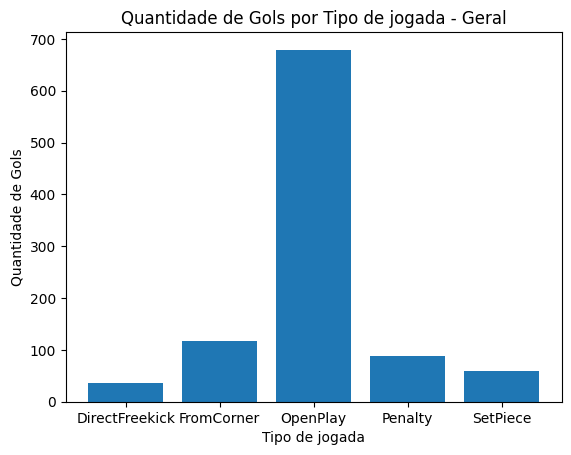

In [19]:
plt.bar(df_filt.situation, df_filt.result)

# Adicionar rótulos e título
plt.xlabel('Tipo de jogada')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Tipo de jogada - Geral')

# Exibir o gráfico
plt.show()

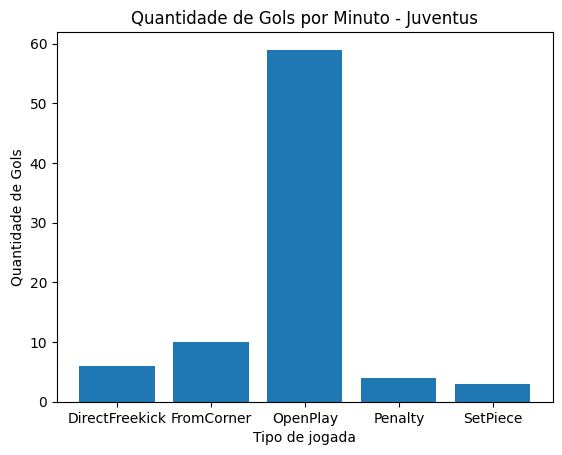

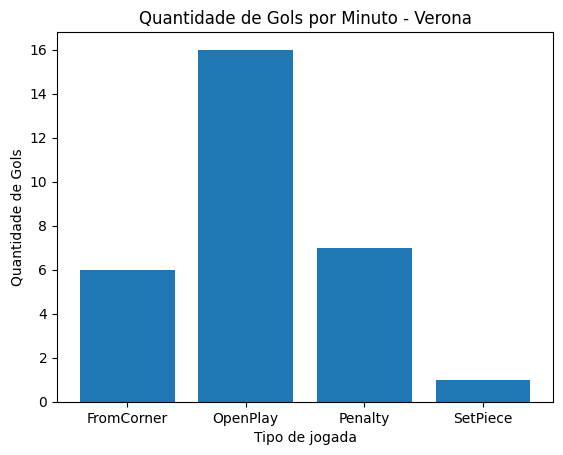

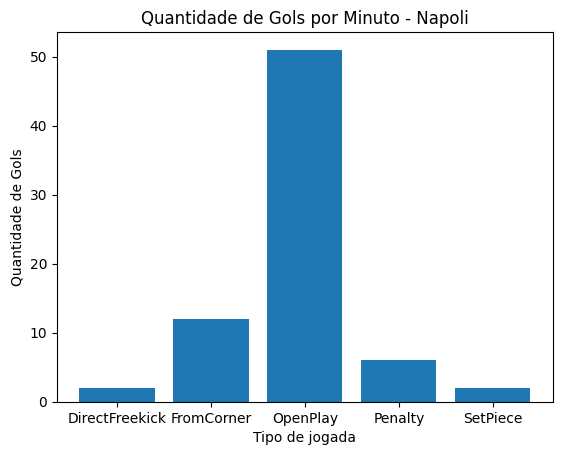

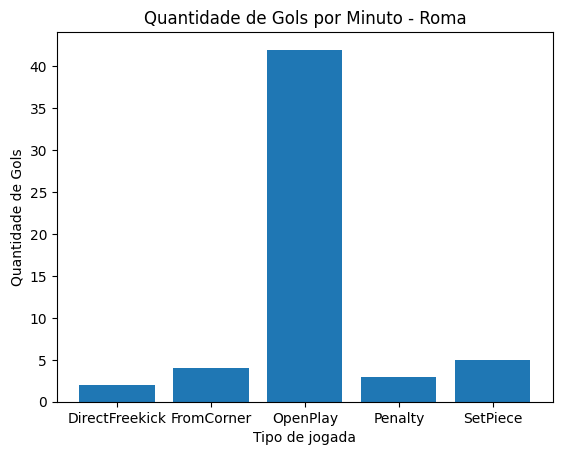

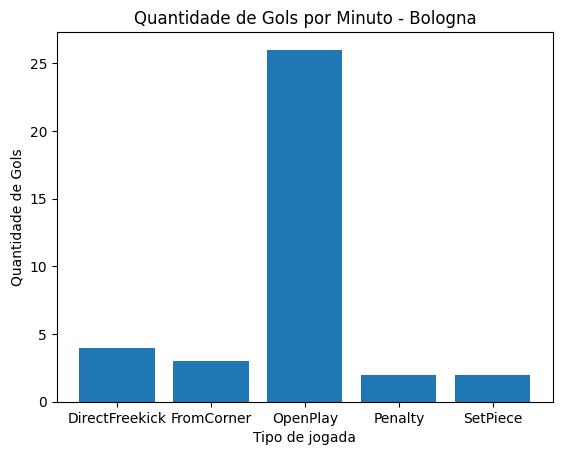

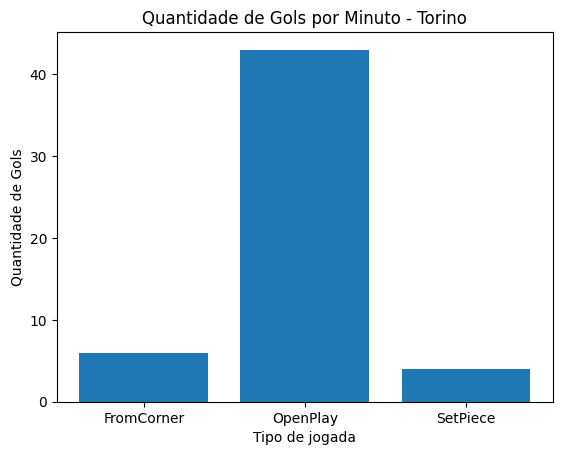

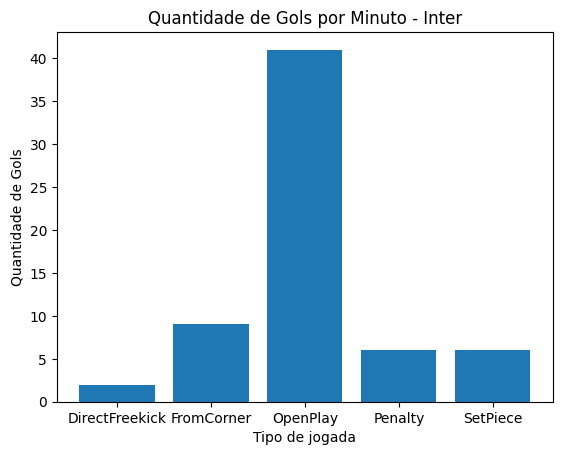

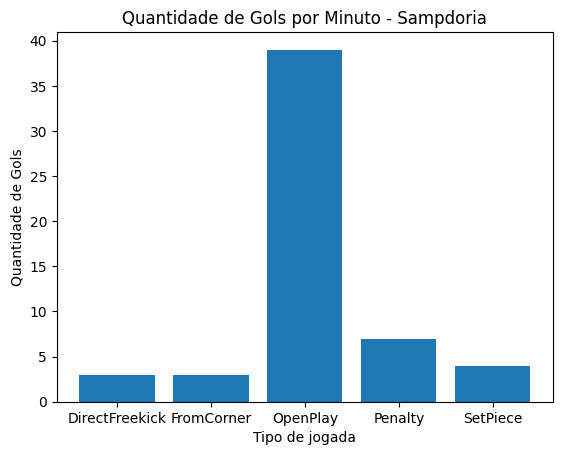

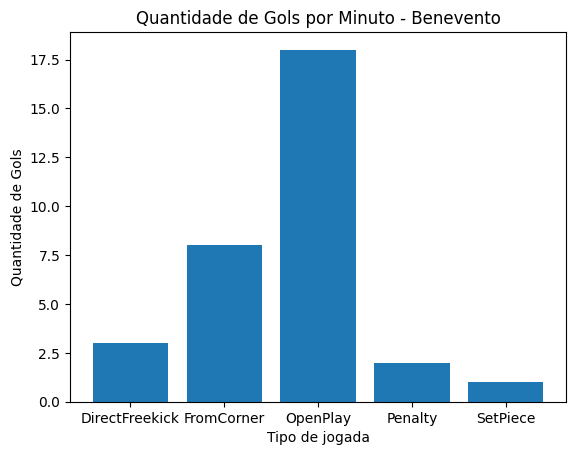

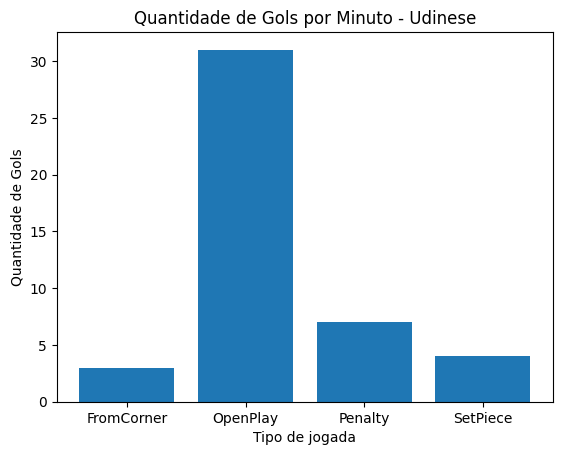

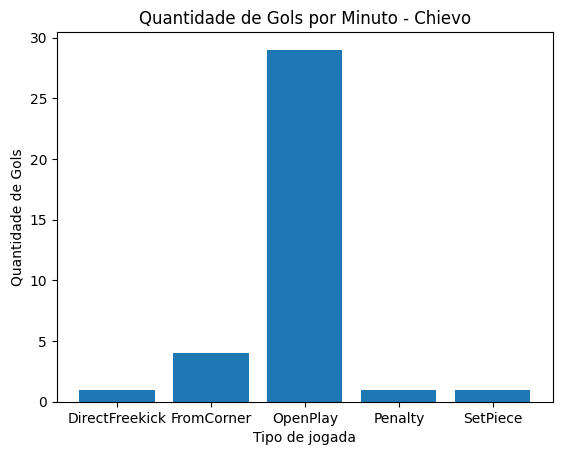

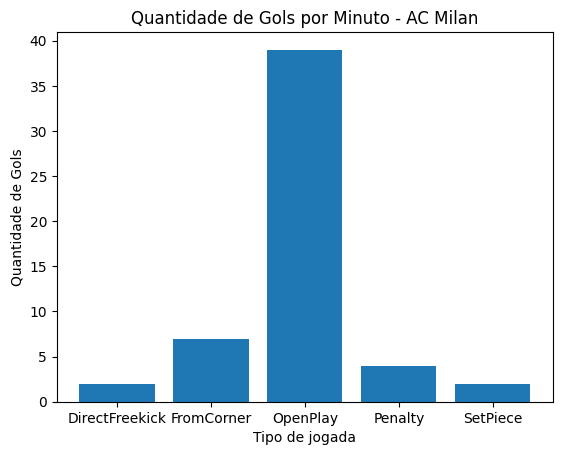

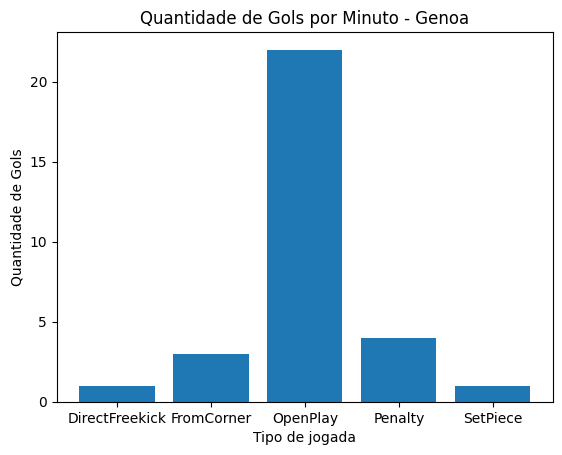

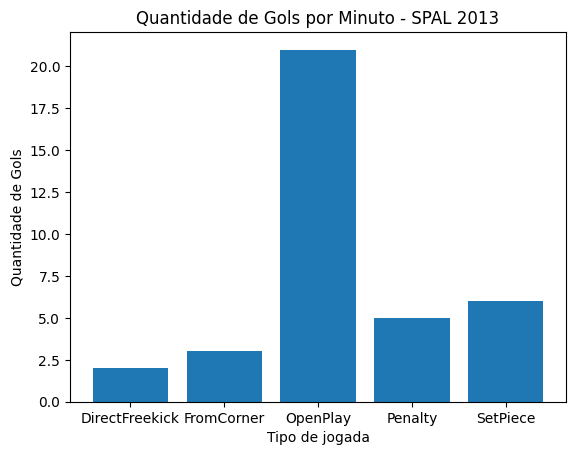

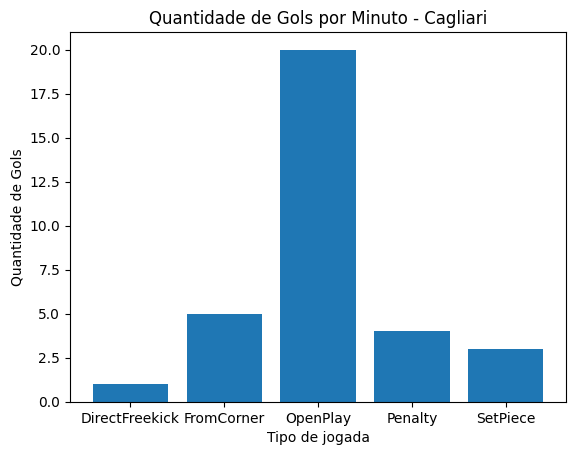

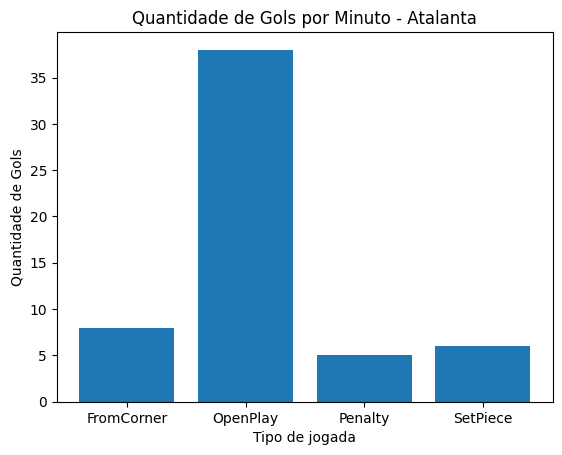

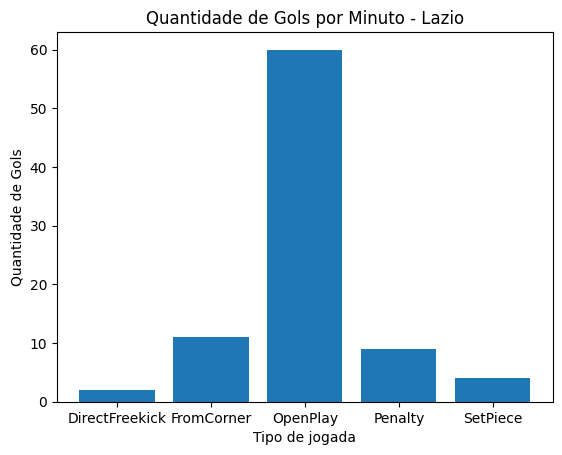

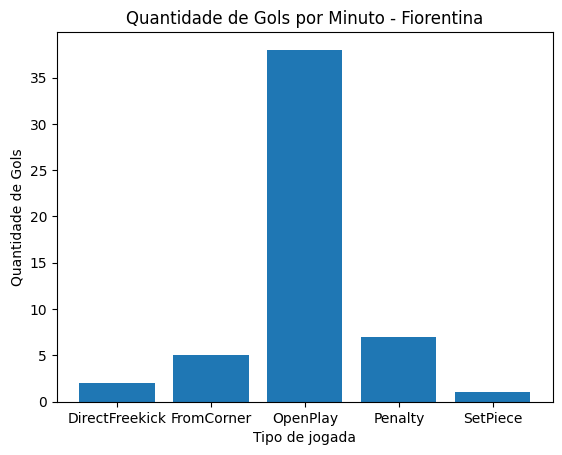

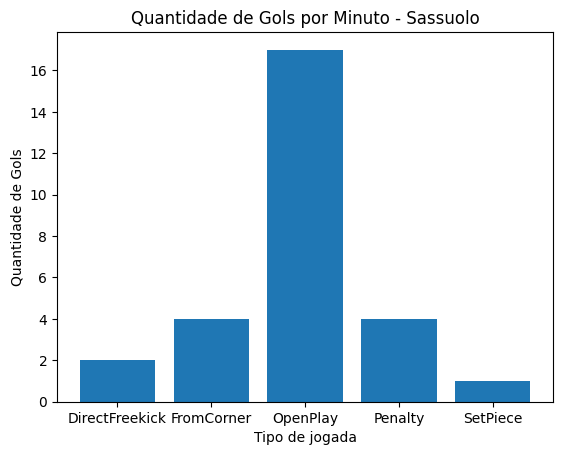

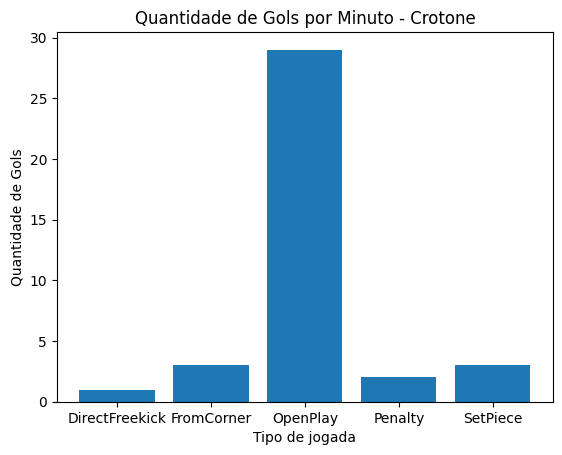

In [21]:
# Análise time por time
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    df_plot = df_aux.groupby("situation")["result"].count().reset_index()

    # Plot
    plt.bar(df_plot.situation, df_plot.result)

    # Adicionar rótulos e título
    plt.xlabel('Tipo de jogada')
    plt.ylabel('Quantidade de Gols')
    plt.title(f'Quantidade de Gols por Minuto - {t}')

    # Exibir o gráfico
    plt.show()

    print(df_aux.groupby("half")["result"].count().reset_index())
    print("-"*80)

### 3. Chance de sair gol por jogada

In [33]:
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_filt = df_filt.groupby("situation")["xG"].mean().reset_index()
df_filt

,situation,xG
0,DirectFreekick,0.062123
1,FromCorner,0.307496
2,OpenPlay,0.308322
3,Penalty,0.760083
4,SetPiece,0.345138


### 4. Chance de sair gol de acordo com a última ação realizada antes do gol

In [34]:
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_filt = df_filt.groupby("lastAction")["xG"].mean().reset_index()
df_filt

,lastAction,xG
0,Aerial,0.144722
1,BallRecovery,0.217438
2,BallTouch,0.254311
3,BlockedPass,0.604156
4,Chipped,0.232386
5,CornerAwarded,0.145767
6,Cross,0.303071
7,Dispossessed,0.128795
8,HeadPass,0.315778
9,Interception,0.063662


### 5. Importância de se jogar fora ou dentro de casa 

In [121]:
df_filt = df_xg[(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_filt_home = df_filt[(df_filt.h_a == 'h')&(df_filt.result == 'Goal')]
df_filt_away = df_filt[(df_filt.h_a == 'a')&(df_filt.result == 'Goal')]
print(df_filt_home.shape)
print(df_filt_away.shape)

(21599, 20)
(17088, 20)


### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

In [118]:
df_filt = df_xg[(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]

##### Por gol

In [146]:
test = df_xg[df_xg.player == 'Victor Osimhen']
#test = test[test.result == 'Goal']
test.groupby("player")["xG"].sum().reset_index()

,player,xG
0,Victor Osimhen,39.753944


In [147]:
test = test[test.result == 'Goal']
test.groupby("player")["result"].count().reset_index()

,player,result
0,Victor Osimhen,37


##### Por assistência

In [155]:
test = df_xg[df_xg.player_assisted.isin(['Kevin De Bruyne'])]
#test = test[test.result == 'Goal']
test.groupby("player_assisted")["xG"].sum().reset_index()

,player_assisted,xG
0,Kevin De Bruyne,101.135446


In [156]:
test = test[test.result == 'Goal']
test.groupby("player_assisted")["result"].count().reset_index()

,player_assisted,result
0,Kevin De Bruyne,105


## Insights Gerados
- Kane>>>>Messi>>>>CR7